**Lybraries**

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.dpi']= 300  #resolution

In [2]:
def draw_list(ts_list, attribute, ts_number=1000, time = None , xlabel = None, formatter = None):
    if ts_number >= len(ts_list): ts_number = len(ts_list)-1
    fig = plt.figure()
    ax = fig.subplots()
    for ts in ts_list[:ts_number]:
        if time == None: index = list(ts.index.values)
        else: index= ts[time]
        ax.plot(index, ts[attribute])
    ax.set_ylabel(attribute)
    if formatter !=None:
        date_form = DateFormatter(formatter)
        ax.xaxis.set_major_formatter(date_form)
    if xlabel != None:
        ax.set_xlabel(xlabel)
    plt.show()

# Data definition

## Data Import 
I have the first week *week1* and the second, *week2*, both composed by the records from thursday (00:00) to monday(23:59). Time series ofrange of a week are extracted in three lsit: *wee1_list* , *week2_list*, and the union ov the previous: ***week_list***.

Each one is composed by four days: thu1, fri1, sat1, sun1, mon1 (and so the second).
We can extract a list of time series, all of range of a day: ***day_list***.

Then for each one of thi time series, we can extract different part of the days, splitting the ts in 2, 4 or 4 parts.
All this relatively small time series are in the list ***day_split***


For each one of these are saved different attribute and als the date, this give us the possibility to access values for classification in a second time. 
Additive columns for time can be setted and can be usefull for graphical rapresetnation. An example is the column 'time' in day_list, that save the hour but not the date.

In [3]:
time_col = 'date'

attributes = ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


df=pd.read_csv(r'../../data/datatraining.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
print(df.date)
mon1=df[df['Weekday']==0][attributes].copy()
tue1=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed1=df[df['Weekday']==2][attributes].copy() #incompleted too
thu1=df[df['Weekday']==3][attributes].copy()
fri1=df[df['Weekday']==4][attributes].copy()
sat1=df[df['Weekday']==5][attributes].copy()
sun1=df[df['Weekday']==6][attributes].copy()
    
weekdays1 = [thu1,fri1,sat1,sun1,mon1] #I dont want incompleted days, so wednesday and tuesday are excluded



df=pd.read_csv(r'../../data/datatest2.txt')
df[time_col] =  pd.to_datetime(df[time_col], format = '%Y-%m-%d %H:%M:%S')
df['Weekday']=df[time_col].apply(lambda x:x.weekday())
print(df.date)
mon2=df[df['Weekday']==0][attributes].copy()
tue2=df[df['Weekday']==1][attributes].copy()  #missing part of the day
wed2=df[df['Weekday']==2][attributes].copy() #incompleted too
thu2=df[df['Weekday']==3][attributes].copy()
fri2=df[df['Weekday']==4][attributes].copy()
sat2=df[df['Weekday']==5][attributes].copy()
sun2=df[df['Weekday']==6][attributes].copy()
    
weekdays2 = [thu2,fri2,sat2,sun2,mon2] #I dont want incompleted days, so wednesday and tuesday are excluded

        


1      2015-02-04 17:51:00
2      2015-02-04 17:51:59
3      2015-02-04 17:53:00
4      2015-02-04 17:54:00
5      2015-02-04 17:55:00
               ...        
8139   2015-02-10 09:29:00
8140   2015-02-10 09:29:59
8141   2015-02-10 09:30:59
8142   2015-02-10 09:32:00
8143   2015-02-10 09:33:00
Name: date, Length: 8143, dtype: datetime64[ns]
1      2015-02-11 14:48:00
2      2015-02-11 14:49:00
3      2015-02-11 14:50:00
4      2015-02-11 14:51:00
5      2015-02-11 14:51:59
               ...        
9748   2015-02-18 09:15:00
9749   2015-02-18 09:16:00
9750   2015-02-18 09:16:59
9751   2015-02-18 09:17:59
9752   2015-02-18 09:19:00
Name: date, Length: 9752, dtype: datetime64[ns]


### week_list

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


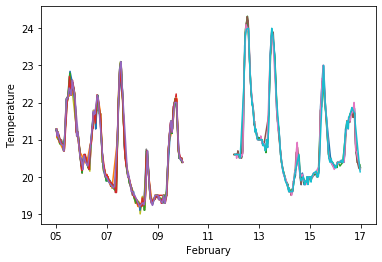

In [4]:
week_size = 144
week_list = []

week1 = pd.DataFrame()
for day in weekdays1:
    day.sort_values(time_col, inplace=True)#first of all: order
    week1 = week1.append(day, ignore_index=True )    ##a week

week1_list = []
tmp = week1.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week1_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract

    
week2 = pd.DataFrame()
for day in weekdays2:    
    day.sort_values(time_col, inplace=True)#first of all: order
    week2 = week2.append(day, ignore_index=True)    ##a week
    
week2_list = []
tmp = week2.copy() 
while(len(tmp)>=week_size):
    ts = tmp.sample(week_size)
    ts.sort_values(time_col, inplace=True)
    week2_list.append(ts)
    week_list.append(ts)
    tmp.drop(ts.index, axis=0, inplace=True) #remove the sample just extract


random.shuffle(week_list)
draw_list(week_list, 'Temperature', 15, time = time_col , xlabel = 'February', formatter = '%d')

### day_list

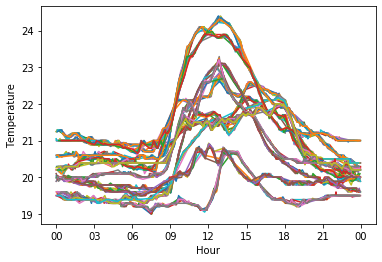

In [5]:
day_list = []
day_size = 120

day1_list=[]
for day in weekdays1:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day1_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extra


day2_list = []
for day in weekdays2:
    day_copy =day.copy()
    day_copy.reset_index(drop=True, inplace=True)
    while (len(day_copy)>= day_size):
        day_copy['time']=day_copy[time_col].apply(lambda x: str(x)[11:19]) #get string %H:%M:%S and lose info about the daydate
        day_copy['time']=pd.to_datetime(day_copy['time'], format='%H:%M:%S')  #now a date is setted automaticaly for all records
        ts=day_copy.sample(day_size)
        ts.sort_values('time', inplace=True) #necessary to order to be sure
        day_list.append(ts)
        day2_list.append(ts)
        day_copy.drop(ts.index, axis=0, inplace=True) #remove the sample just extract


draw_list(day_list, 'Temperature', time = 'time', xlabel = 'Hour', formatter = '%H')

### day_split

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


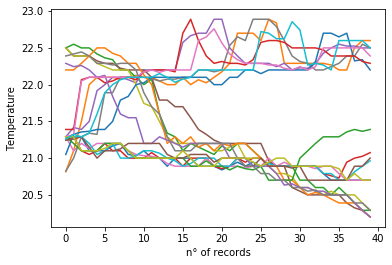

In [6]:
splits = 3 #night #morning #afternoon #evening 
part_size = day_size // splits
day_split = []

day1_split = []
for ts in day1_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day1_split.append(day_part)
    
day2_split = []
for ts in day2_list:
    copy= ts.copy()
    for i in range(splits):
        day_part = copy[part_size*i:part_size*(i+1)]
        day_part['part'] = i    #saving the part of the days
        day_split.append(day_part)
        day2_split.append(day_part)

for day in day1_split:
    day.reset_index(drop=True, inplace=True)  
for day in day2_split:
    day.reset_index(drop=True, inplace=True)  
for day in day_split:
    day.reset_index(drop=True, inplace=True)    


    
draw_list(day_split,  'Temperature', 20, xlabel = 'n° of records')



Text(0, 0.5, 'Temperature')

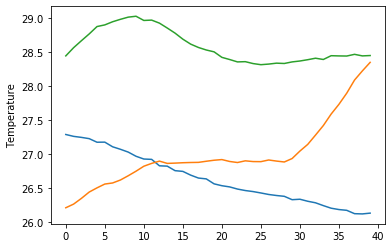

In [7]:
def daypart(ts): 
     if ts['date'][ts.index[ts_size//2]].hour < 8 : return 'night'  
     elif ts['date'][ts.index[ts_size//2]].hour < 16 : return 'morning'
     else: return 'evening'
        
ts_list = []
for temp in day_split:
    ts = temp['Humidity'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
ts_array = np.array(ts_array)
labels = [daypart(ts) for ts in day_split]
labels = np.array(labels)
for i in ['night','morning', 'evening']:
    plt.plot(np.mean(ts_array[np.where(labels == i)], axis=0))
    
plt.ylabel('Temperature')


# CLUSTERING

## Shape Based

#### Parts  of the day 

In [8]:
from tslearn.generators import random_walks
X = random_walks(n_ts=50, sz=32, d=1)
X.shape

(50, 32, 1)

In [18]:
ts_list = []
for temp in day_split:
    ts = temp['Light'].copy()
    ts_list.append(ts)

ts_array = []
ts_size = len(day_split[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size, 1))
    
ts_array = np.array(ts_array)

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
TimeSeriesScalerMeanVariance().fit_transform(ts_array)

def daypart(ts): 
     if ts['date'][ts.index[ts_size//2]].hour < 8 : return 'night'
     elif ts['date'][ts.index[ts_size//2]].hour < 16 : return 'morning'
     else: return 'evening'


labels = [daypart(ts) for ts in day_split]
ts_array.shape

(360, 40, 1)

In [19]:
ts_array

array([[[  0.  ],
        [  0.  ],
        [  0.  ],
        ...,
        [  0.  ],
        [  0.  ],
        [426.  ]],

       [[400.  ],
        [419.  ],
        [454.  ],
        ...,
        [524.  ],
        [513.5 ],
        [489.  ]],

       [[449.5 ],
        [454.75],
        [460.  ],
        ...,
        [  0.  ],
        [  0.  ],
        [  0.  ]],

       ...,

       [[  0.  ],
        [  0.  ],
        [  0.  ],
        ...,
        [  0.  ],
        [  0.  ],
        [  0.  ]],

       [[  0.  ],
        [  0.  ],
        [  0.  ],
        ...,
        [469.  ],
        [465.25],
        [469.  ]],

       [[461.5 ],
        [464.  ],
        [459.  ],
        ...,
        [  0.  ],
        [  0.  ],
        [  0.  ]]])

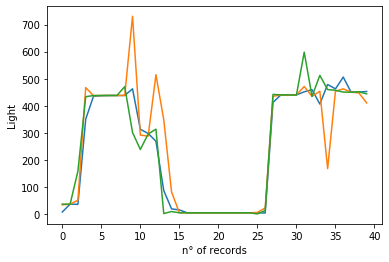

Class,0,1,2
Day part,,,
evening,2,118,0
morning,36,30,54
night,0,99,21


In [20]:
from tslearn.clustering import TimeSeriesKMeans


km = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
km.fit(ts_array)

plt.plot(km.cluster_centers_.reshape(ts_array.shape[1],3))
plt.ylabel('Light')
plt.xlabel('n° of records')

plt.show()
pd.crosstab(pd.Series(labels),pd.Series(km.labels_), colnames = ['Class'], rownames = ['Day part'])

In [15]:
from tslearn.clustering import KShape
ks = KShape(n_clusters=3, verbose=True, random_state=0)
ks.fit(ts_array)


plt.plot(ks.cluster_centers_.reshape(ts_array.shape[1],3))
plt.ylabel('Light')
plt.xlabel('n° of records')
plt.show()
pd.crosstab(pd.Series(labels),pd.Series(ks.labels_), colnames = ['Class'], rownames = ['Day part'])

TypeError: __init__() got an unexpected keyword argument 'metric'

In [16]:
from tslearn.clustering import GlobalAlignmentKernelKMeans
km = GlobalAlignmentKernelKMeans(n_clusters=3,random_state=0)
km.fit(ts_array)

for i in range(3):
    plt.plot(np.mean(ts_array[np.where(km.labels_ == i)], axis=0))
    #plt.xticks([(ts_size/8 * i) for i in range(9)],[0,3,6,9,12,15,18,21,24])
plt.ylabel('Light')
plt.xlabel('n° of records')
plt.show()


pd.crosstab(pd.Series(labels),pd.Series(km.labels_),colnames = ['Class'], rownames = ['Day part'])

TypeError: __init__() got an unexpected keyword argument 'metric'

#### day length

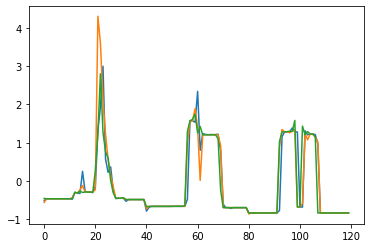

[2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1]


In [16]:
ts_list = []
for temp in day_list:
    ts = temp['Light'].copy()
    ts_list.append((ts-ts.mean())/ts.std())

ts_array = []
ts_size = len(day_list[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,1))
    
ts_array = np.array(ts_array)

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
TimeSeriesScalerMeanVariance().fit_transform(ts_array)

km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, random_state=0)
km.fit(ts_array)

plt.plot(km.cluster_centers_.reshape(ts_array.shape[1],3))
plt.show()
print(km.labels_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 64980 out of 64980 | elapsed:  3.5min finished


Init 1
559.458 --> 453.475 --> 431.826 --> 421.951 --> 425.212 --> 426.619 --> 425.571 --> 425.571 --> 
Init 2
552.943 --> 495.815 --> 475.820 --> 462.510 --> 448.499 --> 400.858 --> 402.214 --> 401.917 --> 401.917 --> 
Init 3
552.181 --> 438.259 --> 430.752 --> 431.741 --> 429.332 --> 425.267 --> 426.380 --> 424.643 --> 423.851 --> 423.851 --> 
Init 4
562.874 --> 445.903 --> 434.797 --> 426.403 --> 421.206 --> 419.460 --> 419.460 --> 
Init 5
561.089 --> 488.541 --> 458.372 --> 434.351 --> 414.904 --> 404.275 --> 404.157 --> 404.157 --> 
Init 6
562.125 --> 446.833 --> 440.872 --> 437.623 --> 434.284 --> 434.284 --> 
Init 7
563.525 --> 440.248 --> 423.330 --> 421.908 --> 423.108 --> 423.703 --> 423.703 --> 
Init 8
560.389 --> 493.010 --> 490.574 --> 487.601 --> 485.497 --> 483.579 --> 483.608 --> 483.608 --> 
Init 9
558.993 --> 434.274 --> 427.739 --> 416.627 --> 415.090 --> 418.055 --> 419.040 --> 419.939 --> 419.939 --> 
Init 10
554.942 --> 431.645 --> 400.920 --> 401.405 --> 402.269 

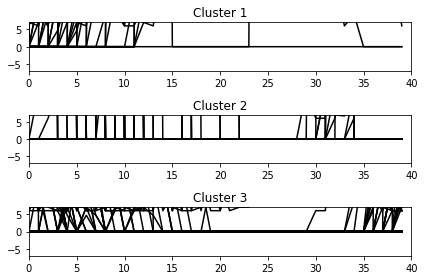

In [24]:
from tslearn.clustering import GlobalAlignmentKernelKMeans
from tslearn.metrics import sigma_gak
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
X_train = ts_array
sz = X_train.shape[1]
gak_km = GlobalAlignmentKernelKMeans(n_clusters=3,
                                     sigma=sigma_gak(X_train),
                                     n_init=20,
                                     verbose=True,
                                     random_state=0)
y_pred = gak_km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-")
    plt.xlim(0, sz)
    plt.ylim(-7, 7)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

## Feature Based

In [44]:
import numpy as np
import scipy.stats as stats

def calculate_features(ts):
    features = {
        'maxT': [np.max(ts['Temperature'])],
        'minT':[np.min(ts['Temperature'])],
        'avgT': [np.mean(ts['Temperature'])],
        'stdT': [np.std(ts['Temperature'])],
        'maxH': [np.max(ts['Humidity'])],
        'minH':[np.min(ts['Humidity'])],
        'avgH': [np.mean(ts['Humidity'])],
        'stdH': [np.std(ts['Humidity'])],
    
    }
    return features

#### Day length

In [69]:
ts_list = []
for temp in day_list:
    ts = temp[['Temperature','Humidity','time']].copy()
    ts_list.append(ts)


F = pd.DataFrame()
for ts in ts_list:
    F = F.append( pd.DataFrame.from_dict(calculate_features(ts)), ignore_index = True)
F 

,maxT,minT,avgT,stdT,maxH,minH,avgH,stdH
0,22.8900,20.290000,21.507264,0.697488,28.39,19.290,24.119451,2.375155
1,22.8900,20.290000,21.542931,0.719533,28.50,19.245,24.345210,2.556419
2,22.7225,20.200000,21.383597,0.671295,28.39,19.390,24.109167,2.325576
3,22.8900,20.356667,21.371062,0.652830,28.20,19.390,23.969103,2.232660
4,22.8900,20.245000,21.519556,0.723677,28.39,19.390,24.360418,2.381931
...,...,...,...,...,...,...,...,...
115,22.0000,20.150000,20.825826,0.596527,30.60,24.290,27.828035,1.938966
116,22.0000,20.166667,20.865493,0.614401,30.60,24.290,28.233540,1.901171
117,22.0000,20.100000,20.806854,0.589994,30.60,24.290,27.955104,2.019272
118,22.0000,20.133333,20.875812,0.607890,30.60,24.290,28.034342,1.893668


In [70]:
ts_array_T = []
ts_array_H = []
ts_size = len(ts_list[0])
for ts in ts_list:
    ts_array_T.append(np.array(ts['Temperature']).reshape(ts_size,))
    ts_array_H.append(np.array(ts['Humidity']).reshape(ts_size,))
ts_array_T = np.array(ts_array_T)
ts_array_H = np.array(ts_array_H)
ts_array_T.shape

(120, 120)

1898.807540300431


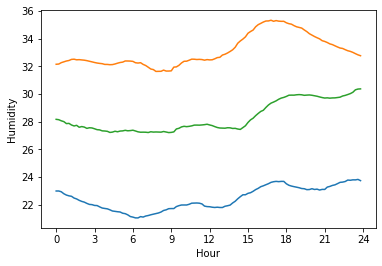

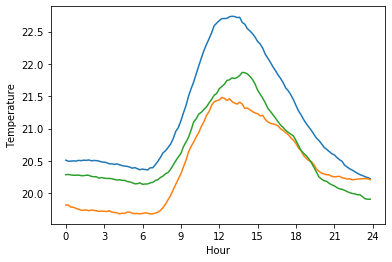

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2]


In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(F)

print(kmeans.inertia_)

for i in range(3):
    plt.plot(np.mean(ts_array_H[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/8 * i) for i in range(9)],[0,3,6,9,12,15,18,21,24])
    plt.ylabel('Humidity')
    plt.xlabel('Hour')

plt.show()
for i in range(3):
    plt.plot(np.mean(ts_array_T[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/8 * i) for i in range(9)],[0,3,6,9,12,15,18,21,24])
    plt.ylabel('Temperature')
    plt.xlabel('Hour')
plt.show()

print(kmeans.labels_)

#### Week length

In [75]:

#for week
ts_list = []
for temp in week_list:
    ts = temp[['Temperature','Humidity']].copy()
    ts_list.append(ts)


F = pd.DataFrame()
for ts in ts_list:
    F = F.append( pd.DataFrame.from_dict(calculate_features(ts)), ignore_index = True)

ts_array_T = []
ts_array_H = []
ts_size = len(ts_list[0])
for ts in ts_list:
    ts_array_T.append(np.array(ts['Temperature']).reshape(ts_size,))
    ts_array_H.append(np.array(ts['Humidity']).reshape(ts_size,))
ts_array_T = np.array(ts_array_T)
ts_array_H = np.array(ts_array_H)
ts_array_T.shape

(100, 144)

48.671102764477496


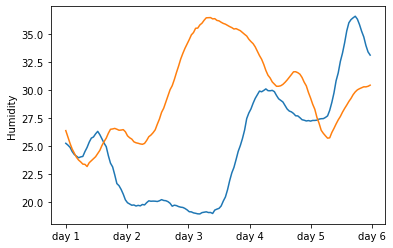

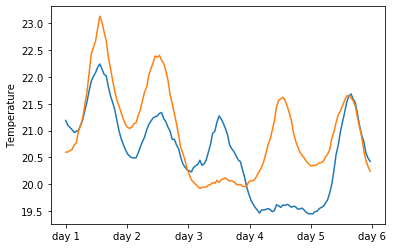

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(F)

print(kmeans.inertia_)

for i in range(2):
    plt.plot(np.mean(ts_array_H[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/5 * i ) for i in range(6)], ['day 1','day 2','day 3','day 4','day 5','day 6'])
    plt.ylabel('Humidity')
    
plt.show()
for i in range(2):
    plt.plot(np.mean(ts_array_T[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/5 * i ) for i in range(6)], ['day 1','day 2','day 3','day 4','day 5','day 6'])
    plt.ylabel('Temperature')
plt.show()

In [77]:
week1o2 = lambda ts : 0 if ts['date'][ts.index[0]].day == 12 else 1
labels = [week1o2(ts) for ts in week_list]
pd.crosstab(pd.Series(labels), pd.Series(kmeans.labels_), colnames=['weeks'], rownames=['Clusters'])
    

weeks,0,1
Clusters,,
0,0,50
1,50,0


#### using tfresh

In [78]:
ts_list = []
for temp in week_list:
    ts = temp[['Temperature','Humidity']].copy()
    ts_list.append(ts)
ts_list[0]

,Temperature,Humidity
23,20.60,26.840000
27,20.60,26.545000
73,20.60,26.145000
94,20.60,26.166667
136,20.60,25.195000
...,...,...
6902,21.10,30.340000
6955,20.70,30.390000
7012,20.39,30.290000
7041,20.39,30.200000


In [79]:



ts_array_T = []
ts_array_H = []
ts_size = len(ts_list[0])
for ts in ts_list:
    ts_array_T.append(np.array(ts['Temperature']).reshape(ts_size,))
    ts_array_H.append(np.array(ts['Humidity']).reshape(ts_size,))
ts_array_T = np.array(ts_array_T)
ts_array_H = np.array(ts_array_H)
ts_array_T.shape

ts_array = []

for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,2))
ts_array = np.array(ts_array)
ts_array.shape
    

(100, 144, 2)

In [80]:
from tslearn.utils import from_tsfresh_dataset, to_tsfresh_dataset
ts_array = to_tsfresh_dataset(ts_array)
ts_array.shape

(14400, 4)

In [81]:
print(ts_array)

     id  time  dim_0      dim_1
0     0     0  20.60  26.840000
1     0     1  20.60  26.545000
2     0     2  20.60  26.145000
3     0     3  20.60  26.166667
4     0     4  20.60  25.195000
..   ..   ...    ...        ...
139  99   139  20.50  34.000000
140  99   140  20.39  33.000000
141  99   141  20.39  33.000000
142  99   142  20.39  33.000000
143  99   143  20.39  32.900000

[14400 rows x 4 columns]


In [330]:
from tsfresh.feature_extraction import extract_features
features = extract_features(timeseries_container=ts_array, column_id='id')

Feature Extraction: 100%|██████████| 10/10 [01:58<00:00, 11.86s/it]


In [ ]:
features.shape

In [337]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(features.values)

print(kmeans.inertia_)

for i in range(2):
    plt.plot(np.mean(ts_array_H[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/5 * i ) for i in range(6)], ['day 1','day 2','day 3','day 4','day 5','day 6'])
    plt.ylabel('Humidity')
    
plt.show()
for i in range(2):
    plt.plot(np.mean(ts_array_T[np.where(kmeans.labels_ == i)], axis=0))
    plt.xticks([(ts_size/5 * i ) for i in range(6)], ['day 1','day 2','day 3','day 4','day 5','day 6'])
    plt.ylabel('Temperature')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

##### Day length

In [338]:

#for part
ts_list = []
for temp in day_split:
    ts = temp[['Temperature','Humidity']].copy()
    ts_list.append(ts)


F = pd.DataFrame()
for ts in ts_list:
    F = F.append( pd.DataFrame.from_dict(calculate_features(ts)), ignore_index = True)

ts_array_T = []
ts_array_H = []
ts_size = len(ts_list[0])
for ts in ts_list:
    ts_array_T.append(np.array(ts['Temperature']).reshape(ts_size,))
    ts_array_H.append(np.array(ts['Humidity']).reshape(ts_size,))
ts_array_T = np.array(ts_array_T)
ts_array_H = np.array(ts_array_H)
ts_array_T.shape

(360, 40)

3781.7653602305527
[1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 1 2 2 1 2 2 1 2 2 1 2 2 1 2 2 1 2 2 1 2 2 1 2 2 1 2 2 1 2 2 1 3 3 1
 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 3 3 1 1 3 0 1
 0 0 1 3 0 1 0 0 1 0 0 1 0 0 1 3 0 1 3 0 1 3 0 1 0 0 1 3 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3
 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 3 3 3 3
 3 0 3 3 0 3 3 0 3 3 0 3 3 0 3 3 0 3 3 3 3 3 0 3 3 0 3 3 1 1 3 1 1 3 1 1 3
 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3 1 1 3]


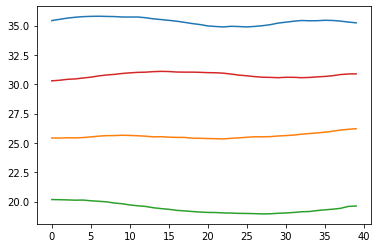

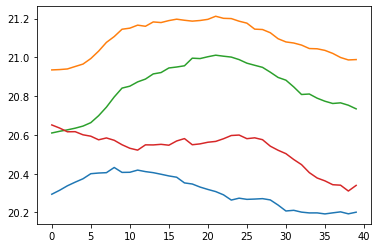

In [339]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(F)

print(kmeans.inertia_)
print(kmeans.labels_)
for i in range(4):
    plt.plot(np.mean(ts_array_H[np.where(kmeans.labels_ == i)], axis=0))
    
    
plt.show()
for i in range(4):
    plt.plot(np.mean(ts_array_T[np.where(kmeans.labels_ == i)], axis=0))
    
plt.show()


## Compression Based

In [90]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN
import zlib
import string

In [91]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))



In [92]:
ts_list = []
for temp in week_list:
    ts = temp['Temperature'].copy()
    ts_list.append((ts-ts.mean())/ts.std())

ts_array = []
ts_size = len(week_list[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
ts_array = np.array(ts_array)
X = ts_array
X.shape

(100, 144)

In [94]:
M = pairwise_distances(X.reshape(X.shape[0], X.shape[1]), metric=cdm_dist)
print(M.shape, X.shape)

(100, 100) (100, 144)


In [89]:
M.shape

(100, 100)

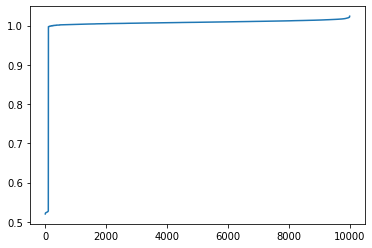

In [345]:
plt.plot(sorted(M.ravel()))
plt.show()

In [107]:
dbscan = DBSCAN(eps=0.2, min_samples=9, metric='precomputed')
dbscan.fit(M)
print(dbscan.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


## Aproximation based 

In [8]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

from tslearn.clustering import TimeSeriesKMeans

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
ts_list = []
for temp in week_list:
    ts = temp['Temperature'].copy()
    ts_list.append((ts-ts.mean())/ts.std())

ts_array = []
ts_size = len(week_list[1])
for ts in ts_list:
    ts_array.append(np.array(ts).reshape(ts_size,))
    
ts_array = np.array(ts_array)
X = ts_array
X.shape

(100, 144)

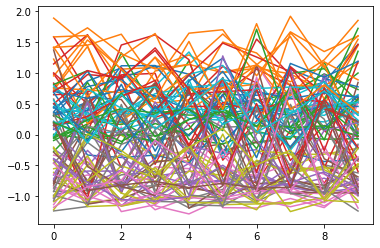

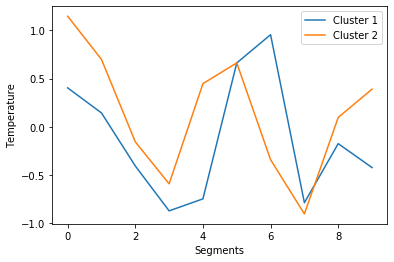

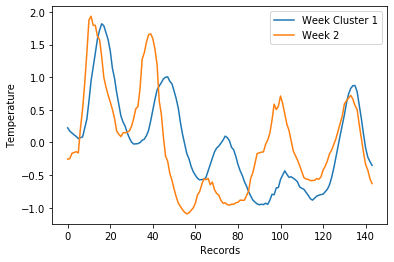

weeks,0,1
Clusters,,
0,49,1
1,31,19


In [17]:

n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X)
#X_paa = paa.inverse_transform(X_paa)
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

plt.plot(km.cluster_centers_.reshape(X_paa.shape[1], 2))
plt.legend(['Cluster 1','Cluster 2'])
plt.xlabel('Segments')
plt.ylabel('Temperature')
plt.show()

for i in range(2):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.legend(['Week Cluster 1','Week 2'])
plt.xlabel('Records')
plt.ylabel('Temperature')
plt.show()


week1o2 = lambda ts : 1 if ts['date'][ts.index[0]].day == 12 else 0
labels = [week1o2(ts) for ts in week_list]
pd.crosstab(pd.Series(labels), pd.Series(km.labels_), colnames=['weeks'], rownames=['Clusters'])

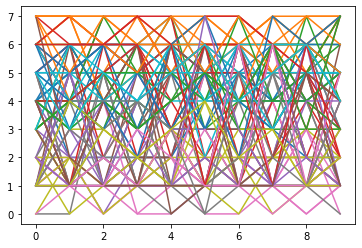

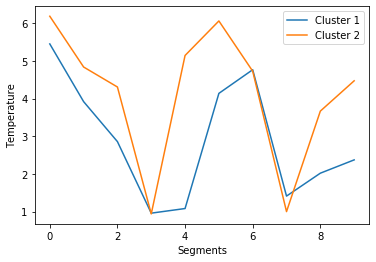

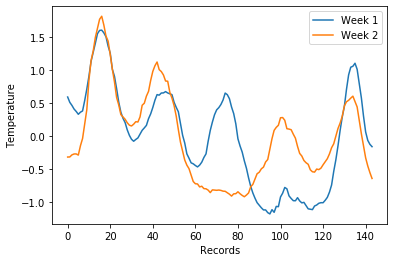

weeks,0,1
Clusters,,
0,49,1
1,0,50


In [18]:
n_sax_symbols = 8
n_saa_segments = 10
SAA = SymbolicAggregateApproximation(n_segments=n_saa_segments, alphabet_size_avg=n_sax_symbols)
X_saa = SAA.fit_transform(X)

plt.plot(X_saa.reshape(X_saa.shape[1], X_paa.shape[0]))
plt.show()

km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_saa)

plt.plot(km.cluster_centers_.reshape(X_saa.shape[1], 2))
plt.legend(['Cluster 1','Cluster 2'])
plt.xlabel('Segments')
plt.ylabel('Temperature')
plt.show()

for i in range(2):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.legend(['Week 1','Week 2'])
plt.xlabel('Records')
plt.ylabel('Temperature')
plt.show()



week1o2 = lambda ts : 1 if ts['date'][ts.index[0]].day == 12 else 0
labels = [week1o2(ts) for ts in week_list]
pd.crosstab(pd.Series(labels), pd.Series(km.labels_), colnames=['weeks'], rownames=['Clusters'])

In [351]:
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

X_ods = one_d_sax.fit_transform(X)

X_ods.shape

(100, 10, 2)

ValueError: x and y can be no greater than 2-D, but have shapes (10,) and (10, 100, 2)

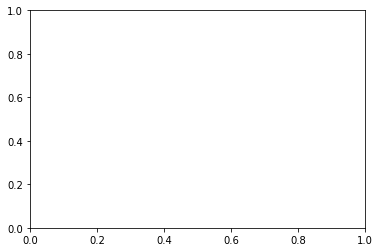

In [352]:
plt.plot(X_ods.reshape(X_ods.shape[1], X_ods.shape[0],2))
plt.show()

km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_ods)

plt.plot(km.cluster_centers_.reshape(X_ods.shape[1], X_ods.shape[0], 2))
plt.show()

for i in range(2):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.show()